<a href="https://colab.research.google.com/github/abhyudaya29/ML_algos/blob/main/Implementation%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementataion of ANN using keras

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.12.0'

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check=["GPU","CPU"]
for device in check:
  out=tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device } is avaliable")
  else:
    print(f"{device} device is not avaliable")


GPU is avaliable
CPU is avaliable


In [6]:
# creating a simple classification using keras on MNIST data

In [7]:
mnist=tf.keras.datasets.mnist

In [8]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [9]:
df=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [11]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [12]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [16]:
X_train[0].shape

(28, 28)

In [17]:
len(X_test)

10000

In [18]:
## scalind the data between 0 and 1

X_valid,X_train=X_train[:5000]/255.,X_train[5000:]/255.
y_valid,y_train=y_train[:5000],y_train[5000:]

X_test=X_test/255.

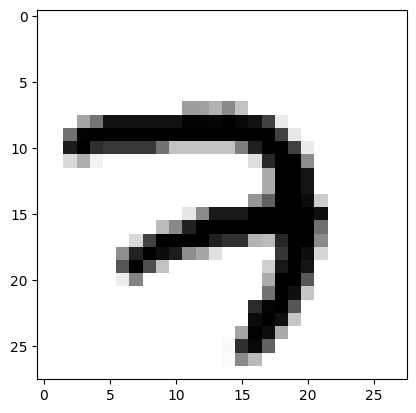

In [72]:
plt.imshow(X_train[0],cmap="binary")
plt.show()

## cmap = binary means it will show the color in black and white form

<Axes: >

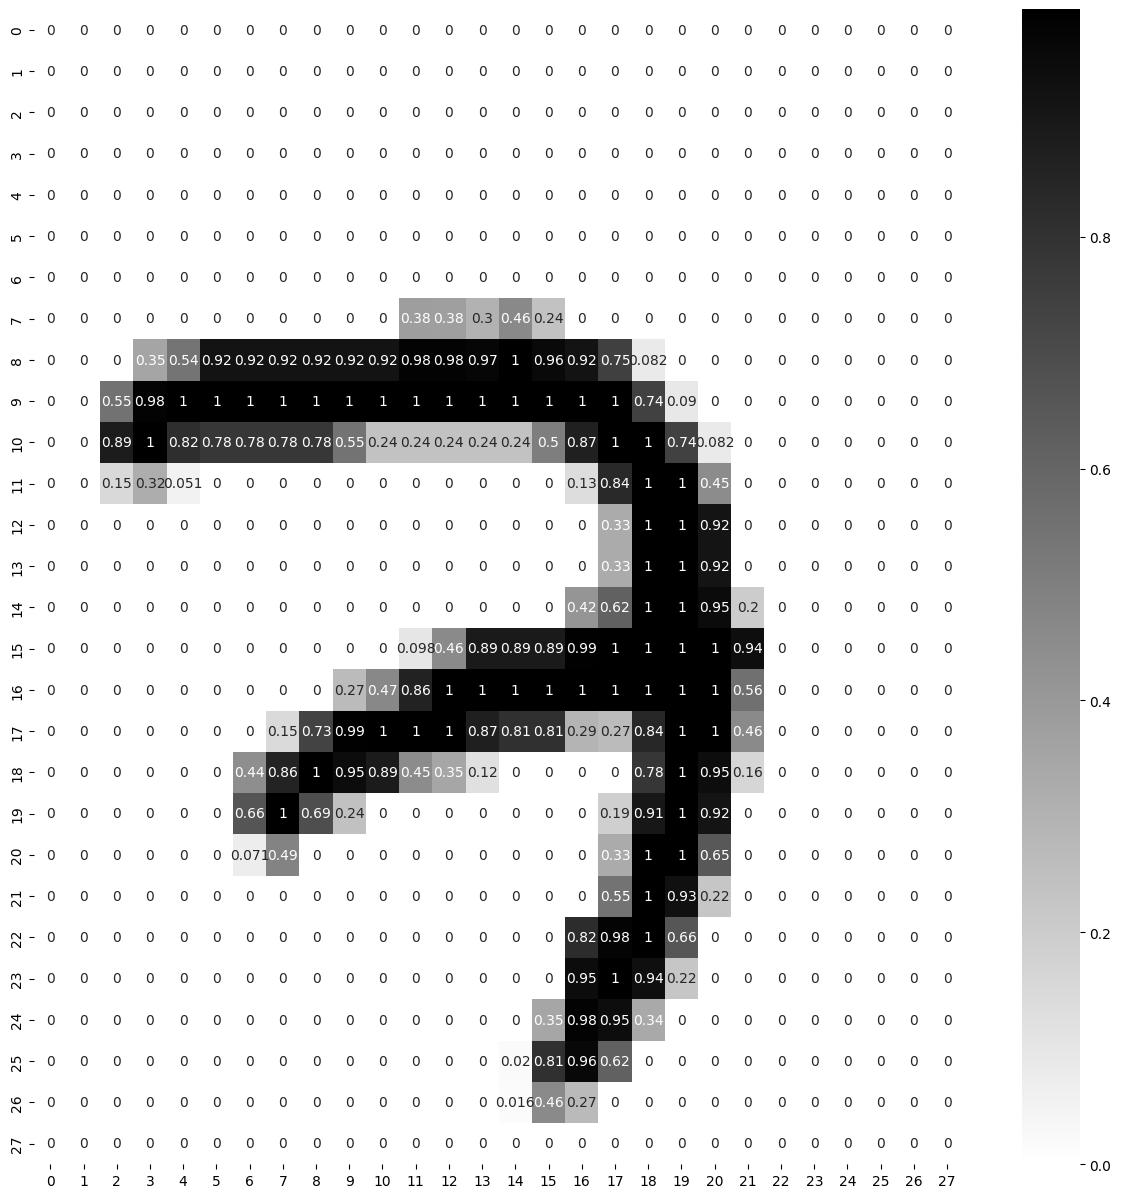

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot =True,cmap="binary")

## the image is range between 0 and 1

In [27]:
28*28

784

In [29]:
## we will flatten these 784 records

In [33]:
## creating layer

Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hideenLayer"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenLayer"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")

]

model_clf=tf.keras.models.Sequential(Layers)

In [34]:
## applying layers using APIS of KEras
from keras.models import Sequential
from keras.layers import Dense,Flatten


# model=Sequential()


In [35]:
model_clf.layers

In [36]:
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hideenLayer (Dense)         (None, 300)               235500    
                                                                 
 hiddenLayer (Dense)         (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
784*300+300

235500

In [39]:
300*100+100

30100

In [41]:
hidden=model_clf.layers[1]
hidden.name

'hideenLayer'

In [42]:
hidden2=model_clf.layers[2]
hidden2.name

'hiddenLayer'

In [43]:
output=model_clf.layers[3]
output.name

'outputLayer'

In [45]:
hidden.get_weights()

[array([[-0.03332857, -0.0503813 ,  0.02663805, ...,  0.03460622,
          0.01867826, -0.03911113],
        [-0.06230442, -0.00317249, -0.04388336, ...,  0.06885219,
          0.06527264,  0.03433648],
        [-0.03317622,  0.02228349, -0.05772373, ...,  0.02277856,
         -0.03048591, -0.01278534],
        ...,
        [ 0.04580011,  0.00605063,  0.01429465, ...,  0.04933839,
          0.05959131, -0.06777968],
        [-0.06384847, -0.00604678,  0.0433618 , ...,  0.05517201,
          0.00770477, -0.00438944],
        [ 0.05905998, -0.01064295, -0.01885376, ..., -0.02836357,
         -0.02795715,  0.04351624]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [48]:
Loss_function='sparse_categorical_crossentropy'
optimizer="SGD"
metrics=['accuracy']
model_clf.compile(loss=Loss_function,
                  optimizer=optimizer,
                  metrics=metrics)

In [49]:
epochs=30
validation=(X_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=epochs,
                      validation_data=validation,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.6058 - accuracy: 0.8431 - val_loss: 0.3016 - val_accuracy: 0.9200
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2883 - accuracy: 0.9173 - val_loss: 0.2383 - val_accuracy: 0.9352
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2360 - accuracy: 0.9318 - val_loss: 0.2046 - val_accuracy: 0.9462
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2011 - accuracy: 0.9422 - val_loss: 0.1791 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1752 - accuracy: 0.9499 - val_loss: 0.1570 - val_accuracy: 0.9574
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1549 - accuracy: 0.9554 - val_loss: 0.1444 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1383 - accuracy: 0.9601 - val_loss: 0.1367 - val_accuracy

In [50]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 1719}

<Axes: >

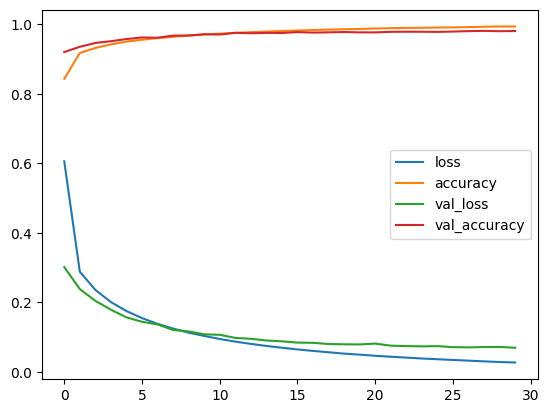

In [53]:
his=pd.DataFrame(history.history)

his.plot()

In [54]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9777


[0.07074309885501862, 0.9776999950408936]

In [55]:
x_new=X_test[:3]

In [57]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

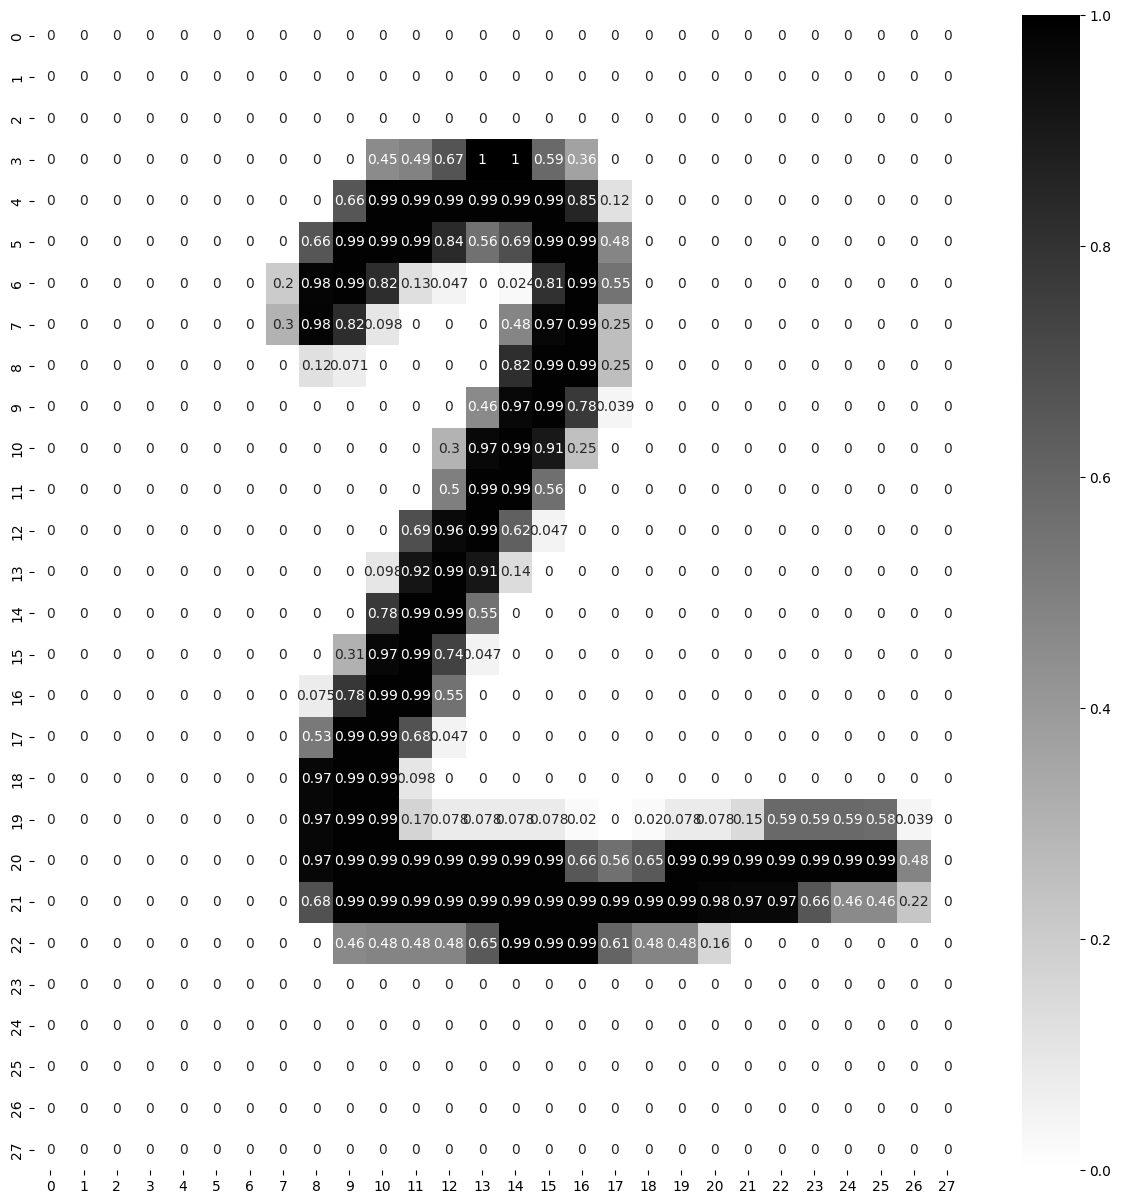

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(X_test[1],annot=True,cmap="binary")

In [61]:
y_porb=model_clf.predict(x_new)

1/1 [==============================] - 0s 130ms/step


In [63]:
y_porb.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [65]:
y_porb

array([[6.9372118e-07, 5.4018449e-07, 6.8577478e-06, 8.5318177e-05,
        6.8121815e-09, 4.4846382e-07, 1.4557223e-11, 9.9989367e-01,
        2.9104626e-06, 9.5240457e-06],
       [1.3313583e-07, 4.0778672e-05, 9.9991989e-01, 8.0802747e-06,
        5.3364854e-13, 1.4136533e-07, 6.0585933e-07, 6.7197428e-12,
        3.0441086e-05, 4.9529946e-12],
       [3.3057729e-06, 9.9698943e-01, 2.4760206e-04, 7.7862052e-05,
        4.9855834e-04, 1.9414724e-04, 6.6298060e-05, 1.4429835e-03,
        4.6715920e-04, 1.2735297e-05]], dtype=float32)

In [66]:
y_pred=np.argmax(y_porb,axis=-1)

In [67]:
y_pred

array([7, 2, 1])

In [68]:
actual

array([7, 2, 1], dtype=uint8)

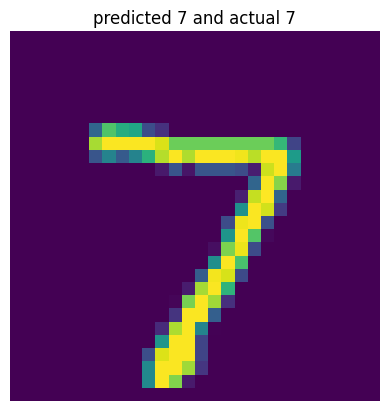

##############


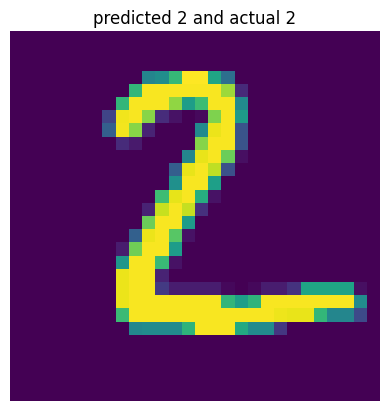

##############


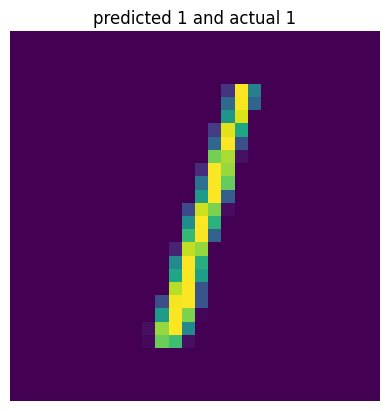

##############


In [74]:
for data,pred,actual_data in zip(x_new,y_pred,actual):
  plt.imshow(data)
  plt.title(f"predicted {pred} and actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("##############")